# Building an Image Classifier using Keras and TensorFlow
### Don't forget to run the following commands in order to import the proper libraries
### You may also need to be in a separate environment in order to run TensorFlow

In [25]:
#Importing the necessary libraries
import numpy as np
import pandas as od
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Conda commands for installing tensorflow, pip, and keras if you don't already have them
#conda install tensorflow
#conda install pip
#pip install --upgrade tensorflow==2.0.0-rc1

In [26]:
#Importing keras and tensorlow and checking the versions
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


## We will be using the famous Fashion MNIST dataset in order to learn how image classification works
### The dataset contains roughly 70,000 images of fashion items such as t-shirts, pants, shoes, etc. and the goal is to train a model to accurately classify each image

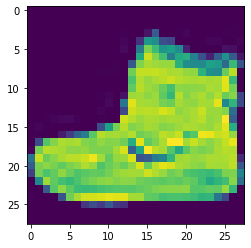

In [27]:
#Loading the data into tuples
#The first tuple contains training data for both the images and labels while the second tuple contains testing data
fashionData = keras.datasets.fashion_mnist
(imageTrain, labelTrain), (imageTest, labelTest) = fashionData.load_data()

#Showing an example of what the first image looks like
plt.imshow(imageTrain[0])

In [28]:
#To view the label of an image, we follow a similar approach
#Each number represents a given category: 0 - T-Shirt/Top, 1 - Trouser, and so forth.
labelTrain[0]

#As you can see, the label for a boot is 9

9

In [29]:
#Numbers aren't very useful so we'll add class names to the data to make it easier to read
classNames = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]

#So now, I can directly access items based on their classname
classNames[labelTrain[0]]

'Boot'

In [30]:
#To better understand what the dataset is, instead of using an image, we can just view it as an array
imageTrain[0]

#Each image is a 28x28 grayscale image represented by pixel values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Now that we understand the data, it's now time to normalize the image data and come up with a training/testing split

In [31]:
#To normalize our data, we will convert it all to the same scale
imageTrainNormalized = imageTrain / 255.0 #This restricts the pixel value to be between 0 and 1
imageTestNormalized = imageTest / 255.0

#Since we know the data is only from 0 to 255, we can do this to normalize it.
#In typical machine learning normalization processes, we would subtract each number by the mean and divide by the
#standard deviation

In [32]:
#When we loaded the data earlier, we had 60,000 images for training and 10,000 for testing.
#Now, we further split the training data into training/validation sets in order to tune our hyperparameters

#Splitting the image data and label data into training/validation sets by choosing the first 5000 as the validation set
#and the rest for training
imageTrain, imageValidation = imageTrainNormalized[5000:], imageTrainNormalized[:5000]
labelTrain, labelValidation = labelTrain[5000:], labelTrain[:5000]
imageTest = imageTestNormalized

#Showing what our new data looks like
imageTrain[0]

#You can now see that the values are all between 0 and 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

## Now that the data is in proper format, we can now create the neural network using Keras

In [33]:
#There are two types of API's in Keras to create models: Sequential and Functional
#For simple neural networks, sequential is the most straight forward

model = keras.models.Sequential()

#Now we'll add the input layer, a couple hidden layers, and then the output layer
#The input layer is a 28x28 array and we want the output to be one of 10 answers (clothing categories)
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu")) #Relu is the preferred activation method for classification
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax")) #Softmax is the preferred activation method for 
                                                          #classification with mutually exclusive categories
    
#Printing a summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
#We'll now compile our model to specify our loss function, the optimizer, and what metrics to use
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
#We use that specific loss function since we have labels for our categories
#SGD is a form of gradient descent and this tells our model to use back-propagation

#Next, we fit our model using the image and label training data (this could take a while based on your epoch value)
modelHistory = model.fit(imageTrain, labelTrain, epochs = 30, validation_data = (imageValidation, labelValidation))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7149 - accuracy: 0.7659 - val_loss: 0.4958 - val_accuracy: 0.8360
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4850 - accuracy: 0.8322 - val_loss: 0.4369 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4420 - accuracy: 0.8456 - val_loss: 0.4100 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4148 - accuracy: 0.8539 - val_loss: 0.4058 - val_accuracy: 0.8578
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3952 - accuracy: 0.8607 - val_loss: 0.3874 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3785 - accuracy: 0.8668 - val_loss: 0.3740 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3662 - accuracy: 0.8706 - val_loss: 0.3751 - val_accuracy:

In [40]:
#To see some attributes of our model, there are a few functions we can call to get a better idea
modelHistory.history

#The history function lets us see how our model improved after each epoch

{'loss': [0.7148729562759399,
  0.4850018322467804,
  0.44202595949172974,
  0.4148392081260681,
  0.3952029347419739,
  0.37852248549461365,
  0.366193562746048,
  0.3535443842411041,
  0.34428277611732483,
  0.33467987179756165,
  0.32588836550712585,
  0.31816720962524414,
  0.31069913506507874,
  0.30433014035224915,
  0.2980756163597107,
  0.2914330065250397,
  0.2854008078575134,
  0.2802108824253082,
  0.27494674921035767,
  0.26983264088630676,
  0.26425063610076904,
  0.2587514817714691,
  0.2558557391166687,
  0.2505996525287628,
  0.24698257446289062,
  0.24224479496479034,
  0.2378620207309723,
  0.23369325697422028,
  0.22888478636741638,
  0.22596612572669983],
 'accuracy': [0.7658727169036865,
  0.8322181701660156,
  0.8455818295478821,
  0.8538908958435059,
  0.8606908917427063,
  0.8668000102043152,
  0.8706181645393372,
  0.8745818138122559,
  0.8778908848762512,
  0.8806727528572083,
  0.8835999965667725,
  0.886509120464325,
  0.8889999985694885,
  0.890581846237182

## Once the model has been compiled and ran, it's now time to evaluate how it performed.
### We will also show how to make predictions using our model

In [44]:
#To evaluate our model, we simply use the evaluate function along with our test set to compare 
model.evaluate(imageTest, labelTest)

#The first number is the loss and the second number is the accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8713


[0.35647693276405334, 0.8712999820709229]

In [45]:
#To make predictions of what category an image will fall in based on it's characteristics, we'll just take a sample
#of the data and use the predict function
imageSampleSet = imageTest[:3]

#First, we'll find out the probabibility that the image belongs to each class
classProbability = model.predict(imageSampleSet)
classProbability.round(2)

#As you can see, for the first image, it's 99% sure it's the 10th class (or a boot). And in the next samlple,
#it's certain that it belongs to the 3rd class (or a Pullover) and so on.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
#To just only predict what class the image belongs to, we use the predict_classes function
classPrediction = model.predict_classes(imageSampleSet)
classPrediction

#As you can see, it chose 9, 2, and 1 (if you go back up to the array at the beginning of this, you can see what each
#number corresponds to)
#Also, don't forget arrays start at 0, so 9 actually is the 10th item in the set

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [47]:
#To make things more obvious, we'll just use the classNames variable we created earlier
np.array(classNames)[classPrediction]

array(['Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
#If you'd like to save your model so you don't have to train it everytime you close Jupyter, 
#run the following commands but with your own specifications
model.save('ImageClassificationModel.h5') #It saves in current directory

#If you want to change your current directory, just type %cd "insert directory here"